## Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [2]:
fraud_check= pd.read_csv('Fraud_check.csv')
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## 3. Data Understanding

In [3]:
fraud_check.shape

(600, 6)

In [4]:
fraud_check.isna().sum ()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
fraud_check.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
fraud_check.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

## 4. Data Preparation

In [7]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
fraud_check =pd.get_dummies(fraud_check, columns=['Undergrad','Marital.Status','Urban'], drop_first=True)
fraud_check

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [8]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [0,30000,100000] for Risky and Good

fraud_check["TaxInc"] = pd.cut(fraud_check["Taxable.Income"], bins = [0, 30000,100000], labels = ["Risky", "Good"])
fraud_check

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [9]:
y=fraud_check['TaxInc']

## Data Visualization

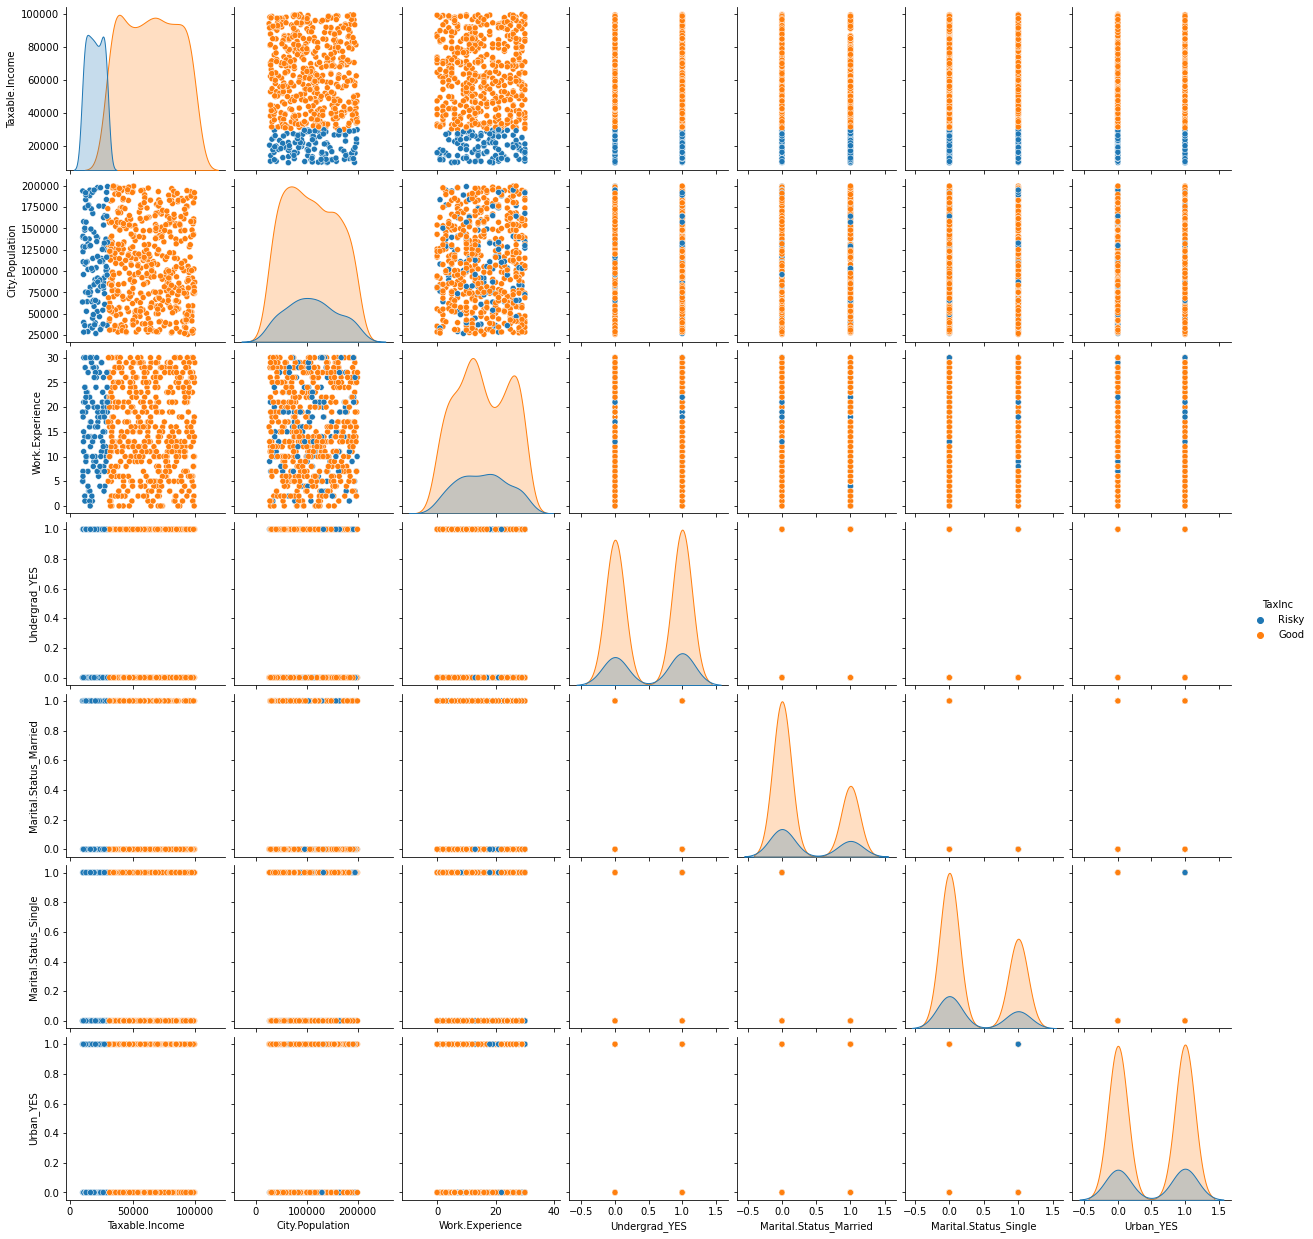

In [10]:
# let's plot pair plot to visualise the attributes all at once

sns.pairplot(data=fraud_check, hue=  'TaxInc')
plt.show()

In [12]:
# Before building the model Normalization function used for making different features (variables) to smaller scale.

def norm_fun (i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
# Normalized data frame (considering the numerical part of data)
fraud_check_norm = norm_fun(fraud_check.iloc[:,1:6])
fraud_check_norm

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single
0,0.139472,0.333333,0.0,0.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0
2,0.772568,1.000000,0.0,1.0,0.0
3,0.962563,0.500000,1.0,0.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0
...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0
596,0.170058,0.066667,1.0,0.0,0.0
597,0.737240,0.000000,0.0,0.0,0.0
598,0.886810,0.566667,1.0,1.0,0.0


## 5. Model Building

In [14]:
x= fraud_check_norm
x

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single
0,0.139472,0.333333,0.0,0.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0
2,0.772568,1.000000,0.0,1.0,0.0
3,0.962563,0.500000,1.0,0.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0
...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0
596,0.170058,0.066667,1.0,0.0,0.0
597,0.737240,0.000000,0.0,0.0,0.0
598,0.886810,0.566667,1.0,1.0,0.0


In [15]:
y=fraud_check[['TaxInc']]
y

,TaxInc
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [16]:
#train test split

x_train, x_test, y_train, y_test= train_test_split(x,y, train_size=0.8, random_state=123)

In [17]:
y_train.value_counts()

TaxInc
Good      382
Risky      98
dtype: int64

In [18]:
x_train.shape, y_train.shape

((480, 5), (480, 1))

In [19]:
x_test.shape, y_test.shape

((120, 5), (120, 1))

## 6. Model Training

In [38]:
rf_model= RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=12)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=12)

### Gridsearch CV

### Train Data

In [39]:
y_pred_train = rf_model.predict(x_train)

In [40]:
print(confusion_matrix(y_train,y_pred_train))

[[382   0]
 [  0  98]]


In [42]:
accuracy = accuracy_score(y_train,y_pred_train)
accuracy

1.0

In [43]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       382
       Risky       1.00      1.00      1.00        98

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



### Test Data

In [44]:
    y_pred_test = rf_model.predict(x_test)

In [45]:
print(confusion_matrix(y_test,y_pred_test))

[[82 12]
 [25  1]]


In [46]:
accuracy_score(y_test,y_pred_test)

0.6916666666666667

In [47]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

        Good       0.77      0.87      0.82        94
       Risky       0.08      0.04      0.05        26

    accuracy                           0.69       120
   macro avg       0.42      0.46      0.43       120
weighted avg       0.62      0.69      0.65       120



## Grid SearchCV

In [50]:
rf_clas = RandomForestClassifier(random_state=1024)
gridsearch_cv = GridSearchCV(estimator= rf_clas,param_grid={'n_estimators':[50,100,150],'criterion':['gini', 'entropy'],'max_depth':[2,3,4,5,6,7,8], 'max_features':[0.5,0.75,1], 'max_samples':[0.5,0.75,1]} ,cv=3)

In [52]:
gridsearch_cv.fit(x_train,y_train)

print(gridsearch_cv.best_score_)
print(gridsearch_cv.best_params_)

0.7958333333333334
{'criterion': 'gini', 'max_depth': 2, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 50}


## Model 2

In [53]:
rf_model_2= RandomForestClassifier(n_estimators=50,criterion='gini', max_depth=2, max_features= 0.5, max_samples= 0.5, random_state=12)
rf_model_2.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, max_features=0.5, max_samples=0.5,
                       n_estimators=50, random_state=12)

## 7. Model Testing || 8. Model Evaluation 

### Train Data

In [54]:
y_pred_train = rf_model_2.predict(x_train)

In [55]:
print(confusion_matrix(y_train,y_pred_train))

[[382   0]
 [ 98   0]]


In [56]:
accuracy = accuracy_score(y_train,y_pred_train)
accuracy

0.7958333333333333

In [57]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

        Good       0.80      1.00      0.89       382
       Risky       0.00      0.00      0.00        98

    accuracy                           0.80       480
   macro avg       0.40      0.50      0.44       480
weighted avg       0.63      0.80      0.71       480



### Test Data

In [58]:
y_pred_test = rf_model_2.predict(x_test)

In [59]:
print(confusion_matrix(y_test,y_pred_test))

[[94  0]
 [26  0]]


In [60]:
accuracy_score(y_test,y_pred_test)

0.7833333333333333

In [61]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

        Good       0.78      1.00      0.88        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



## 9. Model Deployment

In [62]:
from pickle import dump

In [63]:
dump(rf_model_2,open('fraud_data_rf_intelligence.pkl','wb'))

In [64]:
from pickle import load

In [65]:
loaded_rf_model = load(open('fraud_data_rf_intelligence.pkl','rb'))

In [66]:
y_pred = loaded_rf_model.predict(x_test)

## ======================================================================================================================